# Voting

In [5]:
warnings.simplefilter('ignore')
plt.rcParams['font.family'] = 'NanumGothic'

In [119]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import VotingClassifier

model1 = LogisticRegression()
model2 = DecisionTreeClassifier(max_depth =  4, criterion='entropy')
model3 = QuadraticDiscriminantAnalysis()
model4 = GaussianNB()
vote = VotingClassifier(estimators=[('lr', model1), ('tree', model2), ('qda', model3), ('gnb', model4)], weights=[1,1,3,1], voting='soft')
vote.fit(X,y)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=4)),
                             ('qda', QuadraticDiscriminantAnalysis()),
                             ('gnb', GaussianNB())],
                 voting='soft', weights=[1, 1, 3, 1])

In [120]:
from sklearn.model_selection import cross_val_score,KFold
cv = KFold(5,shuffle=True, random_state=5)
cross_val_score(vote, X, y, scoring='accuracy', cv=cv).mean()

0.9800000000000001

# Bagging

base_estimator: 기본 모형

n_estimators: 모형 갯수. 디폴트 10

bootstrap: 데이터의 중복 사용 여부. 디폴트 True

max_samples: 데이터 샘플 중 선택할 샘플의 수 혹은 비율. 디폴트 1.0

bootstrap_features: 특징 차원의 중복 사용 여부. 디폴트 False

max_features: 다차원 독립 변수 중 선택할 차원의 수 혹은 비율 1.0

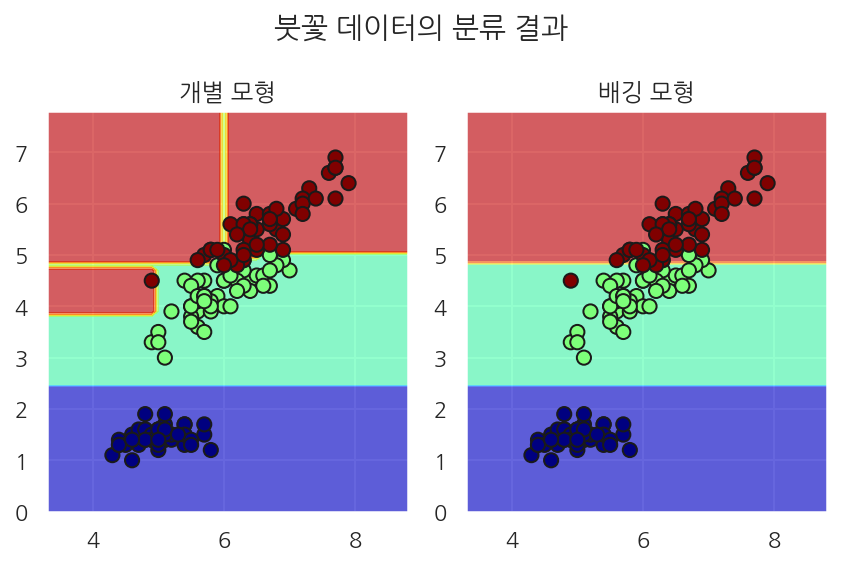

In [6]:
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

iris =load_iris()
X, y = iris.data[:, [0,2]], iris.target

model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X,y)
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=0).fit(X,y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
plt.subplot(121)
Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("개별 모형")
plt.subplot(122)
Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("배깅 모형")
plt.suptitle("붓꽃 데이터의 분류 결과")
plt.tight_layout()
plt.show()

## 연습문제

In [10]:
from sklearn.datasets import load_breast_cancer

cancer =load_breast_cancer()
X = cancer.data
y = cancer.target

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100).fit(X,y)

from sklearn.model_selection import cross_val_score
print(cross_val_score(DecisionTreeClassifier(max_depth=2).fit(X,y), X,y, scoring='accuracy', cv=5).mean())
cross_val_score(model, X, y, scoring='accuracy', cv=5).mean()

0.9279614966620089


0.9490451793199813

In [13]:
from sklearn.datasets import load_breast_cancer

cancer =load_breast_cancer()
X = cancer.data
y = cancer.target

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(GaussianNB(), n_estimators=100).fit(X,y)

from sklearn.model_selection import cross_val_score
print(cross_val_score(GaussianNB().fit(X,y), X,y, scoring='accuracy', cv=5).mean())
cross_val_score(model, X, y, scoring='accuracy', cv=5).mean()

0.9385188635305075


0.9349945660611706

In [14]:
from sklearn.datasets import load_breast_cancer

cancer =load_breast_cancer()
X = cancer.data
y = cancer.target

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(LogisticRegression(), n_estimators=100).fit(X,y)

from sklearn.model_selection import cross_val_score
print(cross_val_score(LogisticRegression().fit(X,y), X,y, scoring='accuracy', cv=5).mean())
cross_val_score(model, X, y, scoring='accuracy', cv=5).mean()

0.9490451793199813


0.9367489520260829

## Random Forest

- DecisionTree만 가능한 Bagging 방법

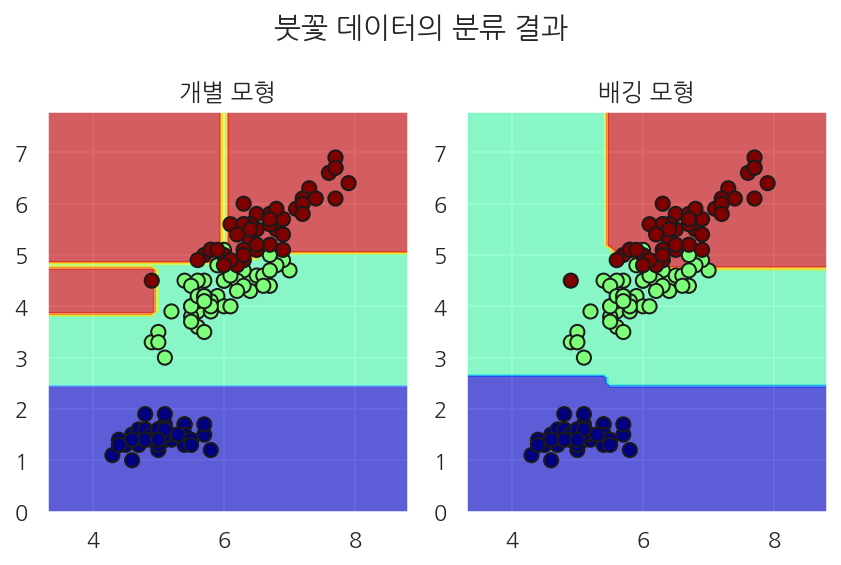

In [16]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

iris =load_iris()
X,y = iris.data[:,[0,2]], iris.target
model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X,y)
model2 = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0).fit(X,y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
plt.subplot(121)
Z1 = model1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("개별 모형")
plt.subplot(122)
Z2 = model2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.6, cmap=mpl.cm.jet)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=1, s=50, cmap=mpl.cm.jet, edgecolors="k")
plt.title("배깅 모형")
plt.suptitle("붓꽃 데이터의 분류 결과")
plt.tight_layout()
plt.show()

랜덤포레스트 장점 : 각 독립변수의 중요도 계산 가능

포레스트 안에서 사용된 모든 노드에 대해 어떤 독립변수를 사용하였고 그 노드에서 얻은 information gain을 구할 수 있으므로, 각각의 독립변수들이 얻어낸 information gain의 평균을 비교

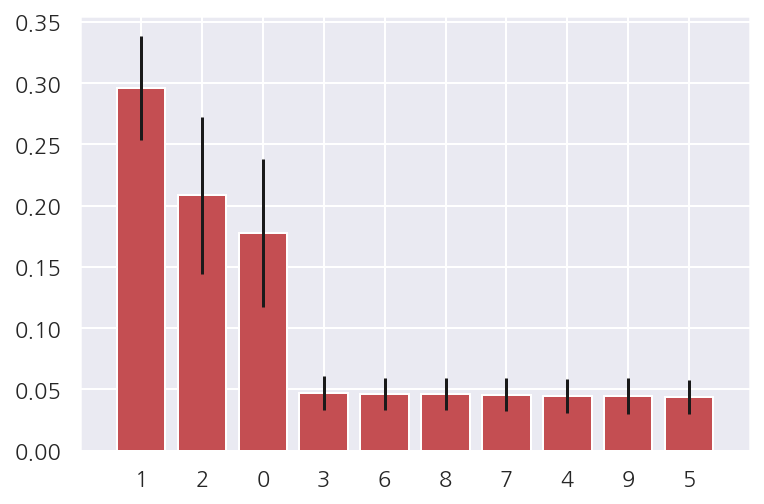

In [25]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

X, y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_redundant=0,
                          n_classes=2, random_state=0, shuffle=False)
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X,y)

importance = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importance)[::-1] # array를 sort시킬 index를 반환

plt.bar(range(X.shape[1]), importance[indices],
       color='r', yerr=std[indices], align='center')
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [29]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesClassifier

data = fetch_olivetti_faces()
X = data.data
y = data.target
print("얼굴사진 수: {}, 픽셀 수: {}".format(*X.shape))

forest = ExtraTreesClassifier(n_estimators=1000, random_state=0)
forest.fit(X,y)

얼굴사진 수: 400, 픽셀 수: 4096


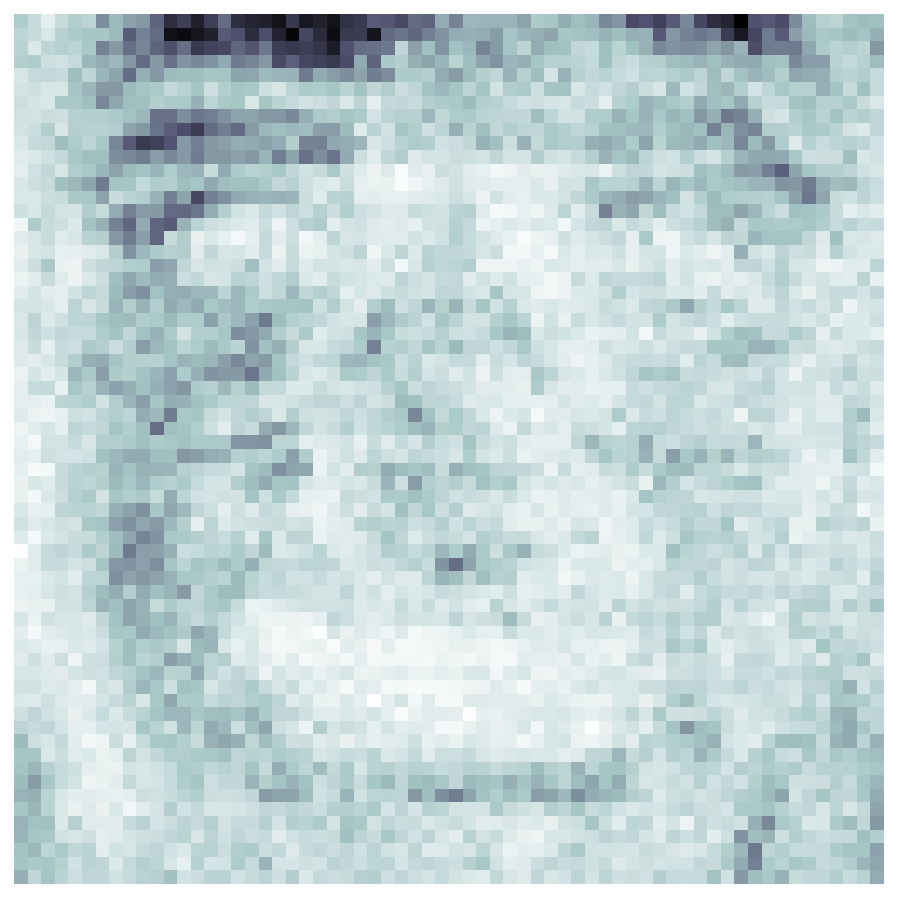

In [35]:
importance = forest.feature_importances_
importance = importance.reshape(data.images[0].shape)

plt.figure(figsize=(8,8))
plt.imshow(importance, cmap=plt.cm.bone_r)
plt.axis('off')
plt.grid(False)
plt.show()

## 연습문제

In [39]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

model = ExtraTreesClassifier(n_estimators=1000, random_state=0).fit(X,y)
cv = KFold(5, shuffle=True, random_state=0)
cross_val_score(model, X,y,scoring='accuracy', cv=cv).mean()

0.9701754385964912

In [41]:
model1 = LogisticRegression()
model2 = GaussianNB()
model3 = QuadraticDiscriminantAnalysis()
model4 = DecisionTreeClassifier()
model = VotingClassifier(
    estimators=[('lr',model1),('gnb',model2),('qda',model3),('tree',model4)],
    voting='soft', weights=[1,1.5,1,1.5]).fit(X,y)

cross_val_score(model,X,y,scoring='accuracy',cv=cv).mean()

0.9596180717279925

In [42]:
from sklearn.ensemble import BaggingClassifier

model1 = DecisionTreeClassifier(max_depth=5)
model2 = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=100)

print(cross_val_score(model1, X, y, scoring='accuracy',cv=cv).mean())
print(cross_val_score(model2, X, y, scoring='accuracy',cv=cv).mean())

0.94027324949542
0.9596180717279925


In [45]:
model = RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=0)
print(cross_val_score(model, X, y, scoring='accuracy',cv=cv).mean())

0.9508306163639186


In [46]:
forest = ExtraTreesClassifier(n_estimators=1000, random_state=0).fit(X,y)
print(cross_val_score(forest, X, y, scoring='accuracy',cv=cv).mean())

0.9701754385964912


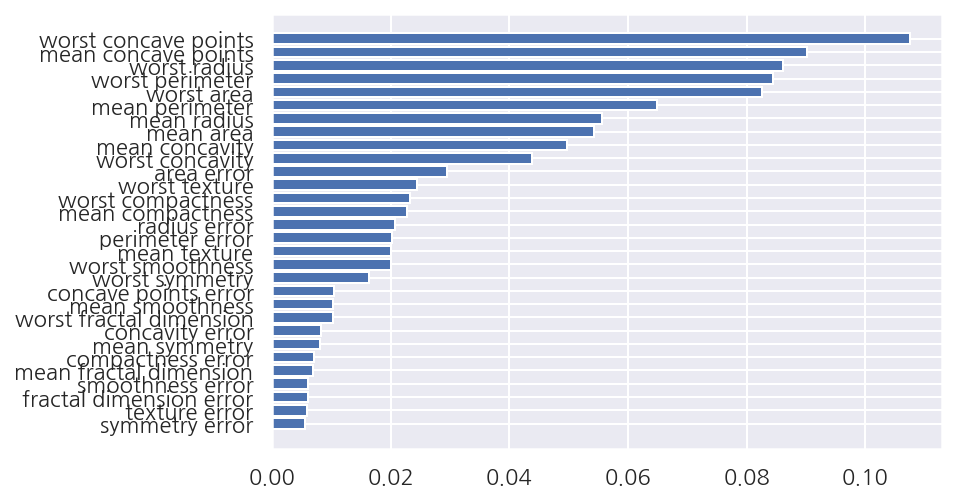

In [51]:
idx = np.argsort(forest.feature_importances_)
name = cancer.feature_names[idx]
value = forest.feature_importances_[idx]

plt.barh(name, value)
plt.show()

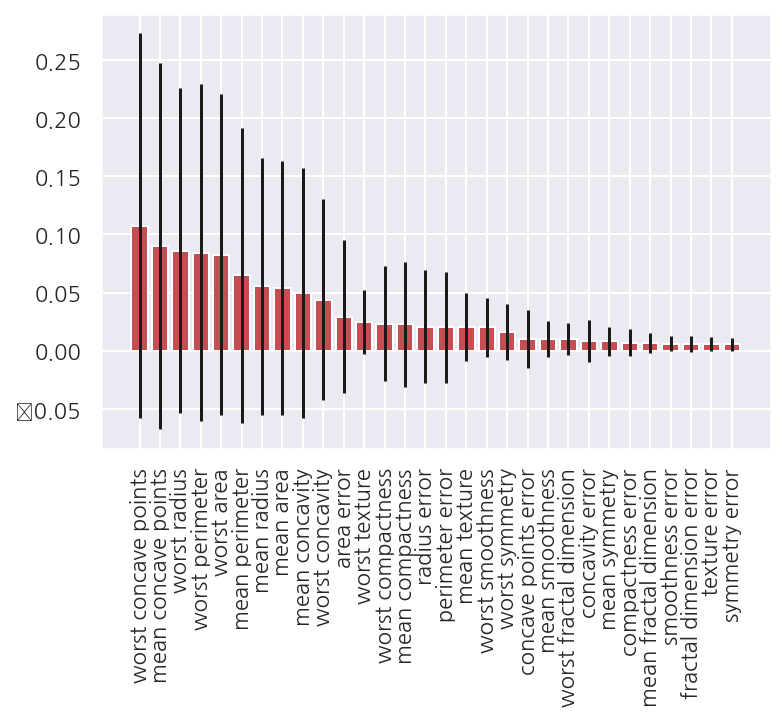

In [65]:
idx = np.argsort(forest.feature_importances_)[::-1]
name = cancer.feature_names[idx]
value = forest.feature_importances_[idx]
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

plt.bar(name, value, color='r', yerr=std[idx])
plt.xticks(rotation=90)
plt.show()